# Mounts, installations and imports

In [1]:
# Mount workspace
from google.colab import drive
drive.mount('/content/drive')
!unzip -o -u "/content/drive/My Drive/ASU/Spring24/DataMining/DM-Project/product-review-sentiment-analysis.zip" -d "."

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/My Drive/ASU/Spring24/DataMining/DM-Project/product-review-sentiment-analysis.zip


In [2]:
# installations
!pip install stormtrooper

In [3]:
# Imports
# external imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# internal imports
from preprocessors import loaders
from utils import constants
from utils import utils
from visualization import visualization
from evaluators import evaluators
from models.LLM import gpt2

# Amazon Dataset

## Load dataset

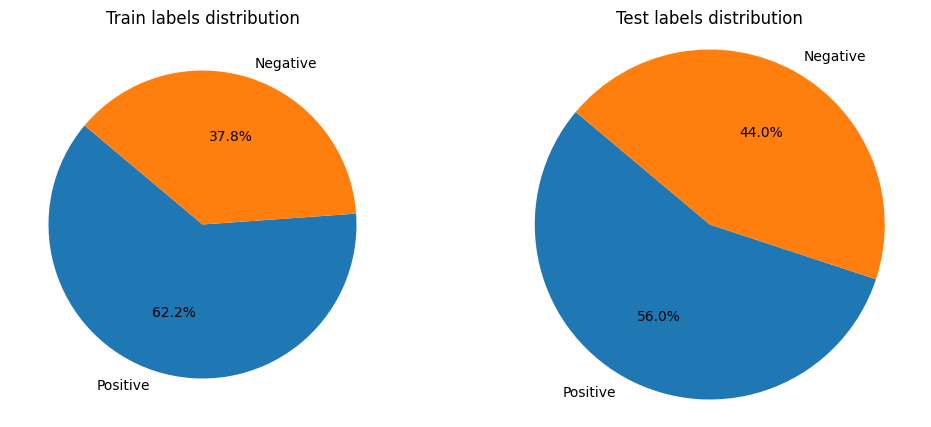

In [4]:
amazon_train_df, amazon_test_df = loaders.load_raw_data(constants.DatasetAmazon)
visualization.plot_label_distribution(amazon_train_df, amazon_test_df)

## Model Initialization

In [5]:
model = gpt2.ZeroShotClassifier(model="distilbert/distilbert-base-uncased",device=0)
model_name = "DistilBert_ZeroShotClassifier"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a desc

## Model Evaluation

In [6]:
amazonEvalResults = evaluators.evaluate(model, amazon_train_df, amazon_test_df, "Amazon")
print("Training and testing accuracies for amazon dataset are %f and %f respectively" %amazonEvalResults.get_accuracies())

Time taken (in seconds) for training:  6.664000000711212e-06


  1%|          | 9/1001 [00:02<03:27,  4.79it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1001/1001 [00:33<00:00, 29.99it/s]


Time taken (in seconds) for predicting Train dataset: 21.565222


  0%|          | 0/1001 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|██████████| 1001/1001 [00:15<00:00, 63.61it/s]

Time taken (in seconds) for predicting Test dataset: 15.497599
Training and testing accuracies for amazon dataset are 0.533467 and 0.498501 respectively


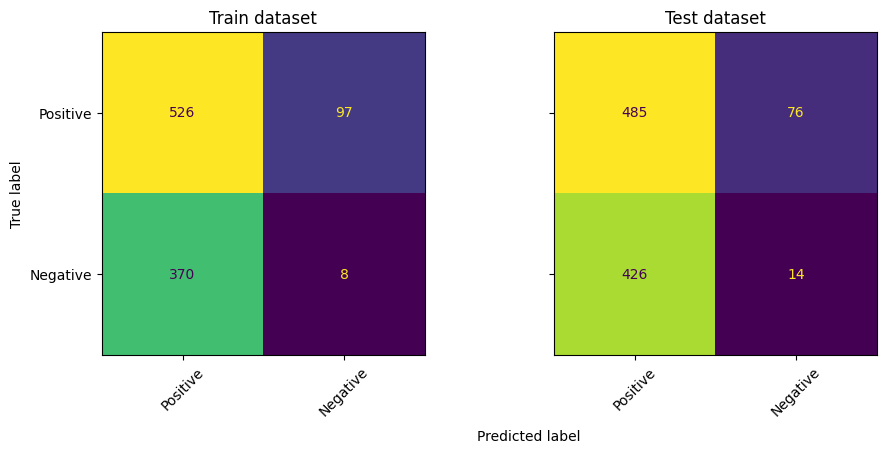

In [7]:
amazonEvalResults.plot_confusion_matrices()

In [8]:
# Test data classification report
amazonEvalResults.display_classification_report(False)

╒══════════════╤═════════════╤═══════════╤════════════╤═══════════╕
│              │   precision │    recall │   f1-score │   support │
╞══════════════╪═════════════╪═══════════╪════════════╪═══════════╡
│ Negative     │    0.155556 │ 0.0318182 │  0.0528302 │       440 │
├──────────────┼─────────────┼───────────┼────────────┼───────────┤
│ Positive     │    0.532382 │ 0.864528  │  0.658967  │       561 │
├──────────────┼─────────────┼───────────┼────────────┼───────────┤
│ macro avg    │    0.343969 │ 0.448173  │  0.355899  │      1001 │
├──────────────┼─────────────┼───────────┼────────────┼───────────┤
│ weighted avg │    0.366744 │ 0.498501  │  0.392533  │      1001 │
╘══════════════╧═════════════╧═══════════╧════════════╧═══════════╛


# Yelp Dataset

## Load Dataset

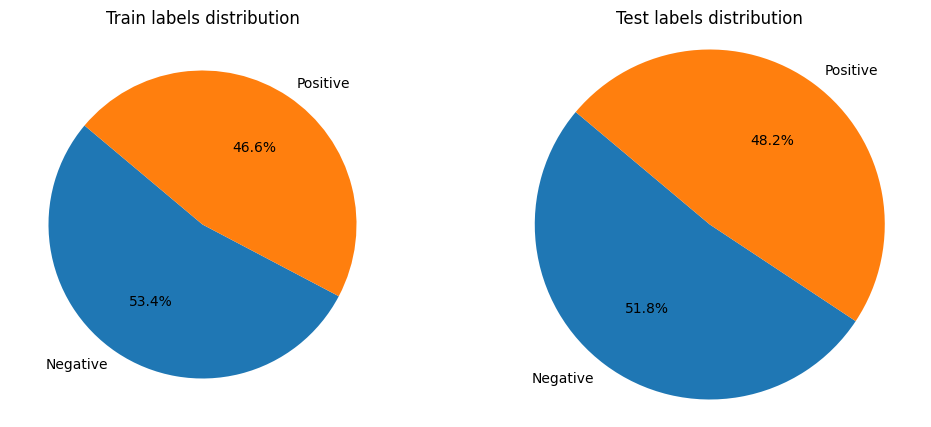

In [9]:
yelp_train_df, yelp_test_df = loaders.load_raw_data(constants.DatasetYelp)
visualization.plot_label_distribution(yelp_train_df, yelp_test_df)

## Model Evaluation

In [10]:
yelpEvalResults = evaluators.evaluate(model, yelp_train_df, yelp_test_df, "Yelp")
print("Training and testing accuracies for yelp dataset are %f and %f respectively" %yelpEvalResults.get_accuracies())

Time taken (in seconds) for training:  1.3777999996023027e-05


  0%|          | 0/1000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/pipelines/base.py:1157: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
  1%|          | 12/1000 [00:00<00:22, 43.08it/s]


RuntimeError: The size of tensor a (1025) must match the size of tensor b (512) at non-singleton dimension 1

In [ ]:
yelpEvalResults.plot_confusion_matrices()

# Comparing performances of the model

In [ ]:
visualization.plot_accuracies_from_results([amazonEvalResults, yelpEvalResults], "Ecommerce platform")

In [ ]:
visualization.plot_pred_time_from_results([amazonEvalResults, yelpEvalResults], "Ecommerce platform")